In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

# Carregando o dataset

### Fonte: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [2]:
columns = {
    'Diabetes_binary': 'tem_diabetes', # 0 = no diabetes / 1 = diabetes
    'HighBP': 'tem_pressao_alta', # 0 = no high BP / 1 = high BP
    'HighChol': 'tem_colesterol_alto', # 0 = no high cholesterol / 1 = high cholesterol
    'CholCheck': 'checou_colesterol', # 0 = no cholesterol check in 5 years / 1 = yes cholesterol check in 5 years
    'BMI': 'indice_massa_corporal', # Body Mass Index
    'Smoker': 'e_fumante', # Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 / = yes
    'Stroke': 'teve_derrame', # Ever told) you had a stroke. 0 = no / 1 = yes
    'HeartDiseaseorAttack': 'tem_doenca_cardiaca', # coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
    'PhysActivity': 'pratica_atividade_fisica', # physical activity in past 30 days - not including job 0 = no 1 = yes
    'Fruits': 'consome_frutas', # Consume Fruit 1 or more times per day 0 = no 1 = yes
    'Veggies': 'consome_vegetais', # Consume Vegetables 1 or more times per day 0 = no 1 = yes
    'HvyAlcoholConsump': 'e_alcoolatra', # (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
    'AnyHealthcare': 'tem_plano_saude', # Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
    'NoDocbcCost': 'nao_foi_ao_medico_por_falta_de_dinheiro', # Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
    'GenHlth': 'auto_avaliacao_saude', # Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
    'MentHlth': 'dias_estressantes', # days of poor mental health scale 1-30 days
    'PhysHlth': 'lesoes_fisicas_30_dias', # physical illness or injury days in past 30 days scale 1-30
    'DiffWalk': 'dificuldade_andar', # Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
    'Sex': 'sexo', # 0 = female 1 = male
    'Age': 'faixa_etaria', # 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
    'Education': 'educacao', # Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.
    'Income': 'faixa_salarial', # Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
}

In [3]:
df = pd.read_csv('diabetes.csv').astype(int).rename(columns=columns)

In [4]:
df

,tem_diabetes,tem_pressao_alta,tem_colesterol_alto,checou_colesterol,indice_massa_corporal,e_fumante,teve_derrame,tem_doenca_cardiaca,pratica_atividade_fisica,consome_frutas,consome_vegetais,e_alcoolatra,tem_plano_saude,nao_foi_ao_medico_por_falta_de_dinheiro,auto_avaliacao_saude,dias_estressantes,lesoes_fisicas_30_dias,dificuldade_andar,sexo,faixa_etaria,educacao,faixa_salarial
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,1,0,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,0,0,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,0,0,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,1,0,1,0,3,0,0,0,1,7,5,1


In [16]:
len([1 for a  in df['tem_diabetes'] if a  == 1]) / len(df['tem_diabetes'])

0.13933301797540207

# Analisando colunas binárias

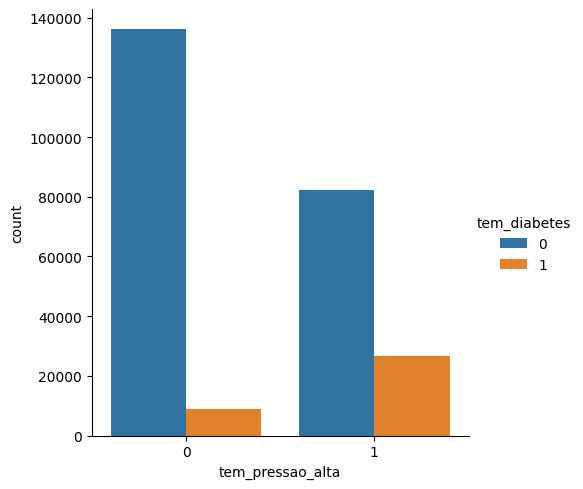

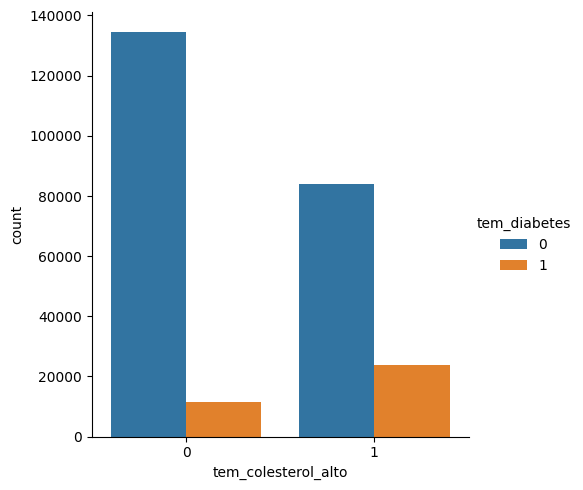

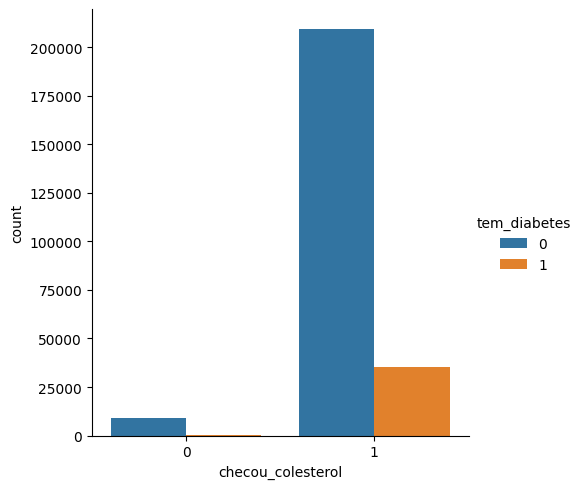

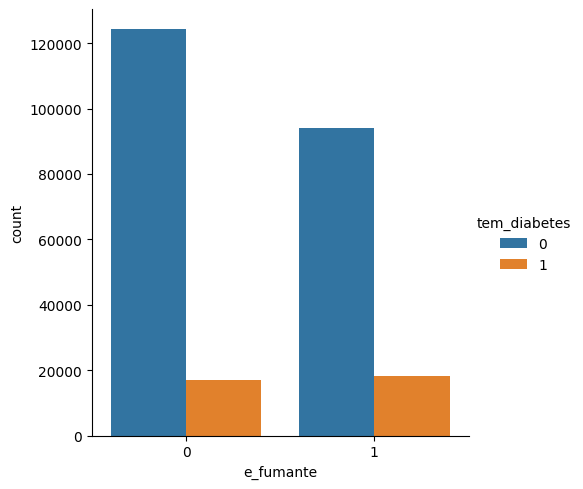

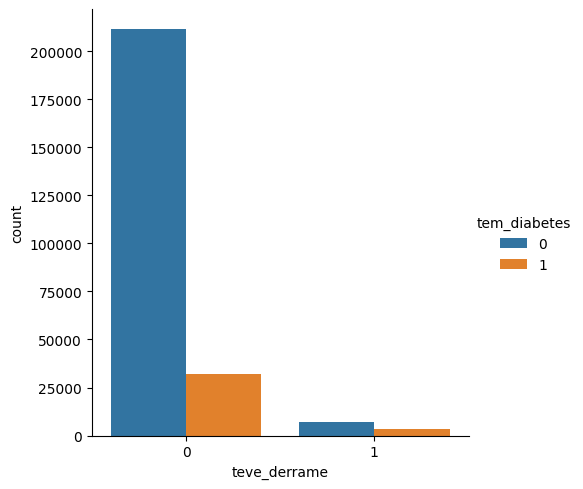

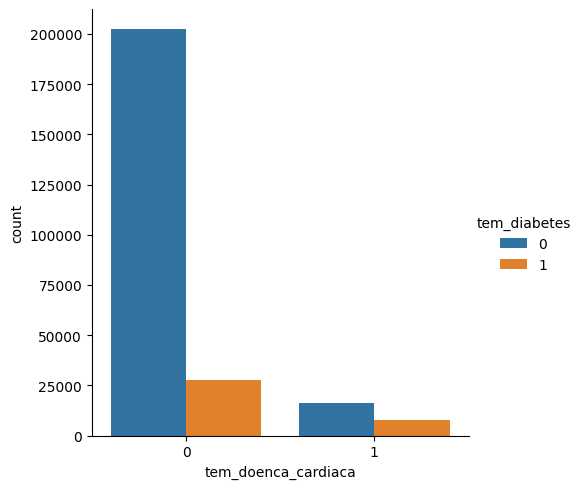

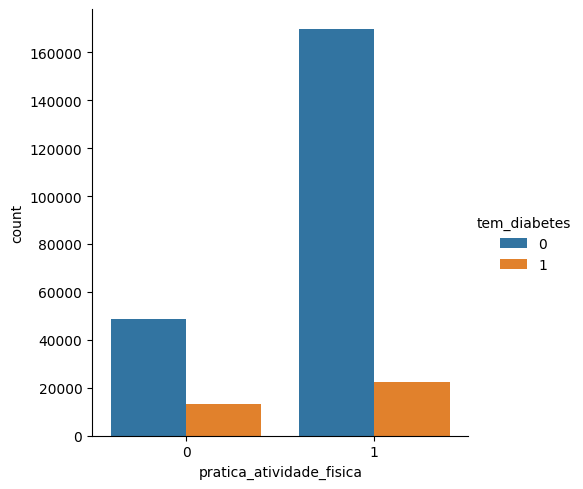

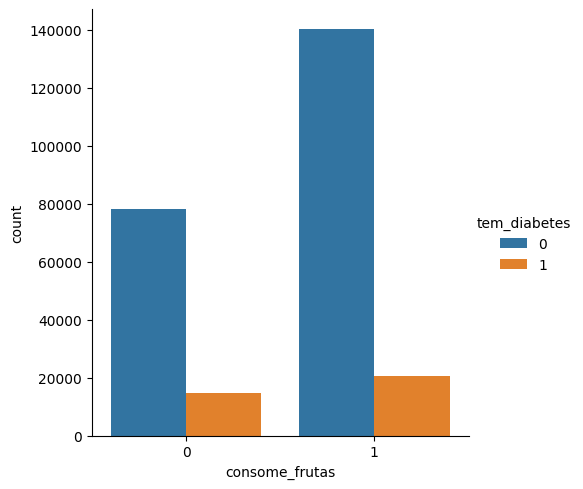

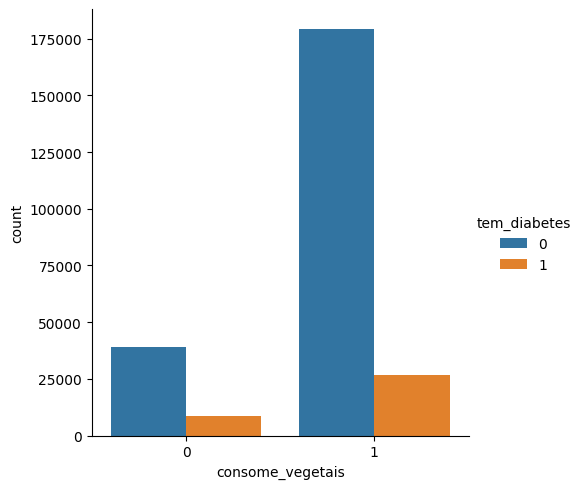

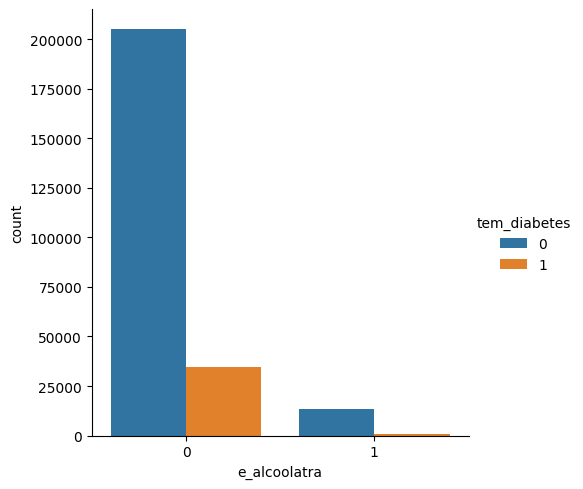

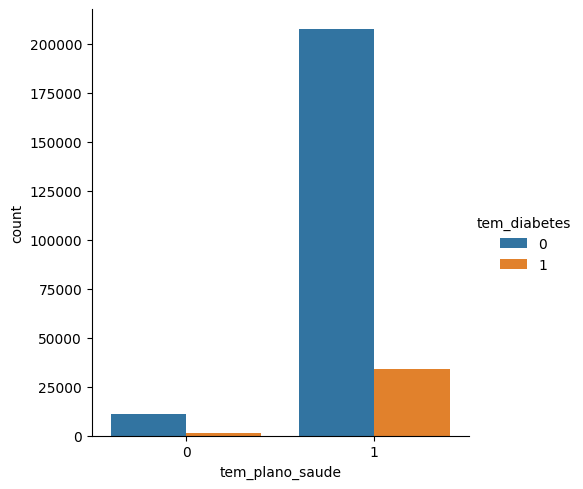

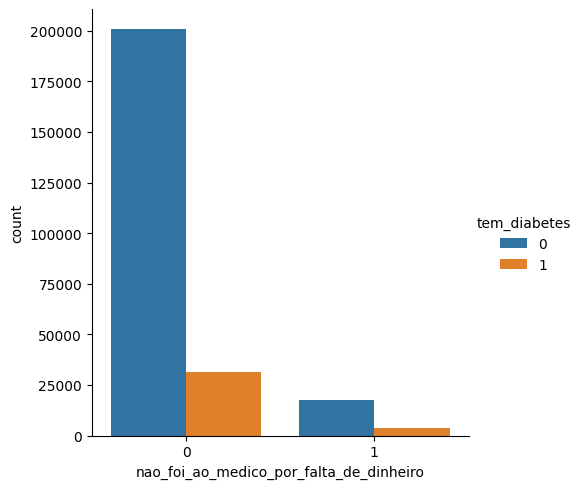

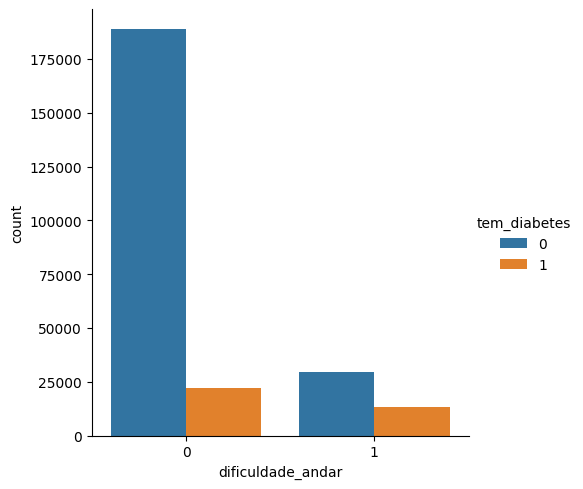

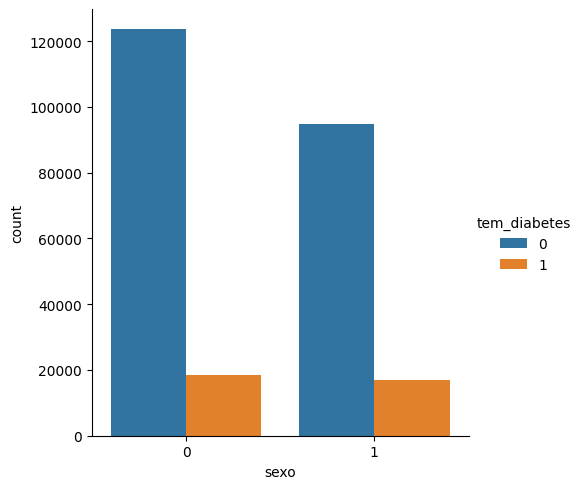

In [5]:
for col in df.columns:
    if col != 'tem_diabetes' and np.isin(df[col].unique(), [0,1]).all():
        sns.catplot(x=col, hue='tem_diabetes', data=df, kind='count')

# Pré processamento dos dados

In [6]:
x = df.loc[:, df.columns != 'tem_diabetes']
y = df['tem_diabetes']

In [7]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Arvore de decisao com todas as colunas

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    scoring=None,
    n_jobs=-1,
    refit=True,
    cv=5,
    verbose=3,
    param_grid={
        'max_features': [
            None,
            'sqrt',
            'log2',
            *[
                i
                for i in range(1, 22)
            ],
        ],
        'class_weight': [
            'balanced', 
            {
                0: 1,
                1: len([a for a in y if not a]) / len([a for a in y if a]),
            }, 
            *[
                {
                    0: 1,
                    1: i,
                }
                for i in range(2, 6)
            ],
        ],
    },
)

grid.fit(x, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=None;, score=0.795 total time=   2.3s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=1;, score=0.797 total time=   0.5s
[CV 5/5] END class_weight={0: 35346, 1: 218334}, max_features=2;, score=0.799 total time=   0.7s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=5;, score=0.797 total time=   1.0s
[CV 3/5] END class_weight={0: 35346, 1: 218334}, max_features=7;, score=0.803 total time=   1.2s
[CV 5/5] END class_weight={0: 35346, 1: 218334}, max_features=9;, score=0.799 total time=   1.3s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=12;, score=0.796 total time=   1.5s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=14;, score=0.795 total time=   1.7s
[CV 4/5] END class_weight={0: 35346, 1: 218334}, max_features=16;, score=0.798 total time=   1.9s
[CV 1/5] END class_weight={0: 35346, 1: 218334}, max_featu

[CV 3/5] END class_weight={0: 35346, 1: 218334}, max_features=3;, score=0.804 total time=   0.9s
[CV 1/5] END class_weight={0: 35346, 1: 218334}, max_features=6;, score=0.806 total time=   1.1s
[CV 4/5] END class_weight={0: 35346, 1: 218334}, max_features=8;, score=0.799 total time=   1.3s
[CV 1/5] END class_weight={0: 35346, 1: 218334}, max_features=11;, score=0.803 total time=   1.6s
[CV 4/5] END class_weight={0: 35346, 1: 218334}, max_features=13;, score=0.799 total time=   1.8s
[CV 1/5] END class_weight={0: 35346, 1: 218334}, max_features=16;, score=0.802 total time=   2.2s
[CV 5/5] END class_weight={0: 35346, 1: 218334}, max_features=18;, score=0.799 total time=   2.2s
[CV 4/5] END class_weight={0: 35346, 1: 218334}, max_features=21;, score=0.796 total time=   2.3s
[CV 2/5] END class_weight={0: 1, 1: 2}, max_features=log2;, score=0.799 total time=   0.8s
[CV 5/5] END class_weight={0: 1, 1: 2}, max_features=1;, score=0.802 total time=   0.6s
[CV 1/5] END class_weight={0: 1, 1: 2}, 

[CV 5/5] END class_weight={0: 35346, 1: 218334}, max_features=8;, score=0.798 total time=   1.2s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=11;, score=0.796 total time=   1.4s
[CV 3/5] END class_weight={0: 35346, 1: 218334}, max_features=13;, score=0.803 total time=   1.6s
[CV 5/5] END class_weight={0: 35346, 1: 218334}, max_features=15;, score=0.800 total time=   1.8s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=18;, score=0.797 total time=   2.0s
[CV 4/5] END class_weight={0: 35346, 1: 218334}, max_features=20;, score=0.798 total time=   2.2s
[CV 1/5] END class_weight={0: 1, 1: 2}, max_features=sqrt;, score=0.805 total time=   0.7s
[CV 3/5] END class_weight={0: 1, 1: 2}, max_features=sqrt;, score=0.806 total time=   0.8s
[CV 5/5] END class_weight={0: 1, 1: 2}, max_features=log2;, score=0.804 total time=   0.8s
[CV 2/5] END class_weight={0: 1, 1: 2}, max_features=4;, score=0.798 total time=   0.9s
[CV 4/5] END class_weight={0: 1, 1: 2}, max_features

[CV 1/5] END class_weight={0: 35346, 1: 218334}, max_features=4;, score=0.804 total time=   0.9s
[CV 3/5] END class_weight={0: 35346, 1: 218334}, max_features=6;, score=0.804 total time=   1.3s
[CV 1/5] END class_weight={0: 35346, 1: 218334}, max_features=9;, score=0.803 total time=   1.6s
[CV 5/5] END class_weight={0: 35346, 1: 218334}, max_features=11;, score=0.798 total time=   1.6s
[CV 4/5] END class_weight={0: 35346, 1: 218334}, max_features=14;, score=0.797 total time=   2.0s
[CV 1/5] END class_weight={0: 35346, 1: 218334}, max_features=17;, score=0.803 total time=   2.3s
[CV 4/5] END class_weight={0: 35346, 1: 218334}, max_features=19;, score=0.796 total time=   2.2s
[CV 1/5] END class_weight={0: 1, 1: 2}, max_features=None;, score=0.799 total time=   2.3s
[CV 4/5] END class_weight={0: 1, 1: 2}, max_features=1;, score=0.801 total time=   0.6s
[CV 5/5] END class_weight={0: 1, 1: 2}, max_features=3;, score=0.801 total time=   0.8s
[CV 2/5] END class_weight={0: 1, 1: 2}, max_featur

[CV 3/5] END class_weight={0: 35346, 1: 218334}, max_features=12;, score=0.802 total time=   1.5s
[CV 5/5] END class_weight={0: 35346, 1: 218334}, max_features=14;, score=0.799 total time=   1.7s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=17;, score=0.794 total time=   1.9s
[CV 3/5] END class_weight={0: 35346, 1: 218334}, max_features=19;, score=0.800 total time=   2.1s
[CV 5/5] END class_weight={0: 35346, 1: 218334}, max_features=21;, score=0.795 total time=   2.3s
[CV 4/5] END class_weight={0: 1, 1: 2}, max_features=log2;, score=0.801 total time=   0.8s
[CV 3/5] END class_weight={0: 1, 1: 2}, max_features=2;, score=0.806 total time=   0.7s
[CV 5/5] END class_weight={0: 1, 1: 2}, max_features=4;, score=0.802 total time=   0.9s
[CV 2/5] END class_weight={0: 1, 1: 2}, max_features=7;, score=0.797 total time=   1.1s
[CV 4/5] END class_weight={0: 1, 1: 2}, max_features=9;, score=0.797 total time=   1.3s
[CV 1/5] END class_weight={0: 1, 1: 2}, max_features=12;, score=0.8

[CV 1/5] END class_weight={0: 35346, 1: 218334}, max_features=5;, score=0.802 total time=   1.3s
[CV 5/5] END class_weight={0: 35346, 1: 218334}, max_features=7;, score=0.800 total time=   1.2s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=10;, score=0.795 total time=   1.5s
[CV 4/5] END class_weight={0: 35346, 1: 218334}, max_features=12;, score=0.800 total time=   1.7s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=15;, score=0.795 total time=   2.0s
[CV 1/5] END class_weight={0: 35346, 1: 218334}, max_features=18;, score=0.803 total time=   2.1s
[CV 3/5] END class_weight={0: 35346, 1: 218334}, max_features=20;, score=0.801 total time=   2.3s
[CV 5/5] END class_weight={0: 1, 1: 2}, max_features=None;, score=0.794 total time=   2.3s
[CV 4/5] END class_weight={0: 1, 1: 2}, max_features=3;, score=0.799 total time=   0.8s
[CV 1/5] END class_weight={0: 1, 1: 2}, max_features=6;, score=0.805 total time=   1.1s
[CV 3/5] END class_weight={0: 1, 1: 2}, max_featu

[CV 4/5] END class_weight={0: 35346, 1: 218334}, max_features=9;, score=0.799 total time=   1.3s
[CV 1/5] END class_weight={0: 35346, 1: 218334}, max_features=12;, score=0.802 total time=   1.6s
[CV 3/5] END class_weight={0: 35346, 1: 218334}, max_features=14;, score=0.801 total time=   1.8s
[CV 5/5] END class_weight={0: 35346, 1: 218334}, max_features=16;, score=0.797 total time=   1.9s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=19;, score=0.797 total time=   2.1s
[CV 2/5] END class_weight={0: 35346, 1: 218334}, max_features=21;, score=0.795 total time=   2.3s
[CV 1/5] END class_weight={0: 1, 1: 2}, max_features=log2;, score=0.803 total time=   0.8s
[CV 3/5] END class_weight={0: 1, 1: 2}, max_features=1;, score=0.803 total time=   0.6s
[CV 2/5] END class_weight={0: 1, 1: 2}, max_features=3;, score=0.798 total time=   0.8s
[CV 5/5] END class_weight={0: 1, 1: 2}, max_features=5;, score=0.802 total time=   0.9s
[CV 1/5] END class_weight={0: 1, 1: 2}, max_features=8;, s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', {0: 35346, 1: 218334},
                                          {0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}, {0: 1, 1: 5}],
                         'max_features': [None, 'sqrt', 'log2', 1, 2, 3, 4, 5,
                                          6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19, 20, 21]},
             verbose=3)

In [25]:
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'class_weight': 'balanced', 'max_features': N...",123,0.797580
1,"{'class_weight': 'balanced', 'max_features': '...",44,0.800410
2,"{'class_weight': 'balanced', 'max_features': '...",18,0.801340
3,"{'class_weight': 'balanced', 'max_features': 1}",114,0.797954
4,"{'class_weight': 'balanced', 'max_features': 2}",32,0.800769
...,...,...,...
139,"{'class_weight': {0: 1, 1: 5}, 'max_features':...",103,0.798199
140,"{'class_weight': {0: 1, 1: 5}, 'max_features':...",108,0.798128
141,"{'class_weight': {0: 1, 1: 5}, 'max_features':...",116,0.797812
142,"{'class_weight': {0: 1, 1: 5}, 'max_features':...",89,0.798833


[CV 4/5] END class_weight={0: 1, 1: 3}, max_features=21;, score=0.793 total time=   2.3s
[CV 5/5] END class_weight={0: 1, 1: 4}, max_features=log2;, score=0.802 total time=   0.9s
[CV 3/5] END class_weight={0: 1, 1: 4}, max_features=3;, score=0.805 total time=   0.9s
[CV 1/5] END class_weight={0: 1, 1: 4}, max_features=6;, score=0.806 total time=   1.1s
[CV 4/5] END class_weight={0: 1, 1: 4}, max_features=8;, score=0.798 total time=   1.3s
[CV 2/5] END class_weight={0: 1, 1: 4}, max_features=11;, score=0.796 total time=   1.6s
[CV 5/5] END class_weight={0: 1, 1: 4}, max_features=13;, score=0.801 total time=   1.8s
[CV 2/5] END class_weight={0: 1, 1: 4}, max_features=16;, score=0.791 total time=   2.0s
[CV 5/5] END class_weight={0: 1, 1: 4}, max_features=18;, score=0.797 total time=   2.3s
[CV 2/5] END class_weight={0: 1, 1: 4}, max_features=21;, score=0.791 total time=   2.3s
[CV 4/5] END class_weight={0: 1, 1: 5}, max_features=sqrt;, score=0.798 total time=   0.9s
[CV 2/5] END class_w

[CV 1/5] END class_weight={0: 1, 1: 4}, max_features=20;, score=0.800 total time=   2.3s
[CV 3/5] END class_weight={0: 1, 1: 5}, max_features=None;, score=0.802 total time=   2.3s
[CV 5/5] END class_weight={0: 1, 1: 5}, max_features=1;, score=0.800 total time=   0.6s
[CV 1/5] END class_weight={0: 1, 1: 5}, max_features=4;, score=0.803 total time=   0.8s
[CV 3/5] END class_weight={0: 1, 1: 5}, max_features=6;, score=0.804 total time=   1.0s
[CV 5/5] END class_weight={0: 1, 1: 5}, max_features=8;, score=0.802 total time=   1.3s
[CV 2/5] END class_weight={0: 1, 1: 5}, max_features=11;, score=0.797 total time=   1.5s
[CV 4/5] END class_weight={0: 1, 1: 5}, max_features=13;, score=0.796 total time=   1.7s
[CV 1/5] END class_weight={0: 1, 1: 5}, max_features=16;, score=0.803 total time=   2.0s
[CV 3/5] END class_weight={0: 1, 1: 5}, max_features=18;, score=0.800 total time=   2.1s
[CV 5/5] END class_weight={0: 1, 1: 5}, max_features=20;, score=0.797 total time=   1.9s
[CV 3/5] END class_weig

In [23]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.)

{'class_weight': {0: 1, 1: 2}, 'max_features': 4}
0.8025268054241564
